### Qestion 1(a)

In [1]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

In [12]:
# Parameters
sigma = 2
alpha = 1/3
delta = 0.1
beta_tilde = 0.90
rho = 1/beta_tilde - 1
g = 2/100
n = 1/100

In [13]:
# Equilibrium capital stock

k_star = (alpha/(rho + delta))**(1/(1-alpha))
k0 = 0.5 * k_star
T = 100
k_vec0 = np.linspace(k0, k_star, T)

In [20]:
# Function to solve

def function1(k_vec0):
    gk = np.zeros_like(k_vec0)
    trm1 = k_vec0[0]**alpha + (1-delta)*k_vec0[0] - k_vec0[1]
    trm2 = k0**alpha + (1-delta)*k0 - k_vec0[0]
    trm3 = alpha*k_vec0[0]**(alpha-1) + (1-delta)
    gk[0] = (trm1/trm2)**sigma - beta_tilde*trm3

    for t in range(1, T-1):
        trm1 = k_vec0[t]**alpha + (1-delta)*k_vec0[t] - k_vec0[t+1]
        trm2 = k_vec0[t-1]**alpha + (1-delta)*k_vec0[t-1] - k_vec0[t]
        trm3 = alpha*k_vec0[t]**(alpha-1) + (1-delta)
        gk[t] = (trm1/trm2)**sigma - beta_tilde*trm3
        
# Calculate the residual for the last period T-1 outside the loop
    trm1 = k_vec0[T-1]**alpha + (1-delta)*k_vec0[T-1] - k_star
    trm2 = k_vec0[T-2]**alpha + (1-delta)*k_vec0[T-2] - k_vec0[T-1]
    trm3 = alpha*k_vec0[T-1]**(alpha-1) + (1-delta)
    gk[T-1] = (trm1/trm2)**sigma - beta_tilde*trm3

    return gk

In [21]:
# Solve for equilibrium capital stock

k_vec = fsolve(fn1, k_vec0)
print(k_vec)

[1.10596379 1.20896501 1.30140657 1.38391356 1.45723607 1.52217313
 1.57952484 1.63006318 1.67451507 1.7135534  1.74779346 1.77779262
 1.80405224 1.82702074 1.84709739 1.86463647 1.87995138 1.89331866
 1.90498187 1.91515517 1.92402655 1.93176087 1.93850256 1.94437801
 1.94949778 1.9539585  1.95784457 1.9612297  1.96417823 1.96674627
 1.96898279 1.97093048 1.97262657 1.97410348 1.97538951 1.97650928
 1.97748426 1.97833316 1.97907226 1.97971576 1.98027601 1.98076378
 1.98118843 1.98155813 1.98187999 1.9821602  1.98240415 1.98261652
 1.98280141 1.98296236 1.98310248 1.98322447 1.98333066 1.98342311
 1.9835036  1.98357366 1.98363465 1.98368775 1.98373398 1.98377422
 1.98380925 1.98383975 1.9838663  1.98388941 1.98390953 1.98392704
 1.98394229 1.98395557 1.98396712 1.98397718 1.98398594 1.98399356
 1.9840002  1.98400598 1.98401101 1.98401539 1.9840192  1.98402252
 1.98402541 1.98402793 1.98403012 1.98403203 1.98403369 1.98403514
 1.9840364  1.98403751 1.98403847 1.98403931 1.98404004 1.9840

### 1(b)

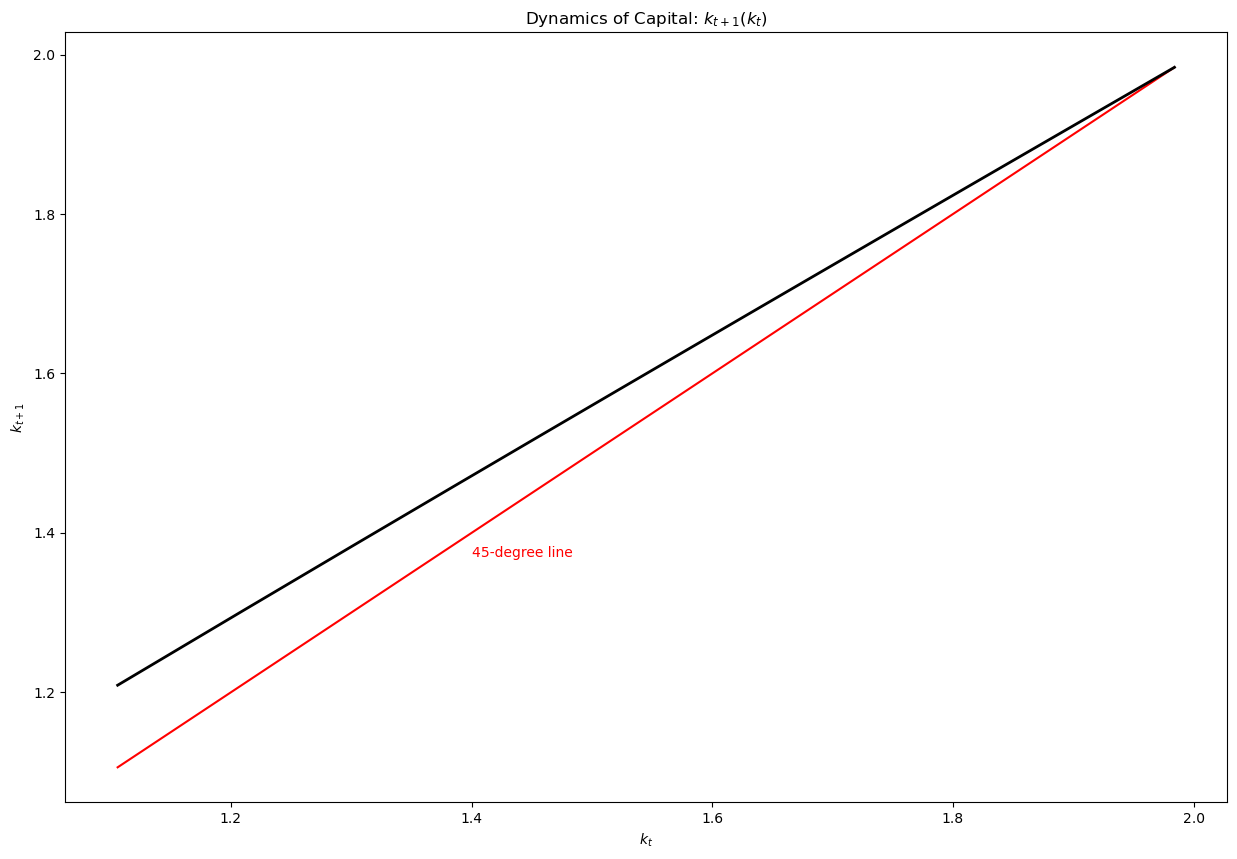

In [25]:
k = k_vec
k_nxt = np.roll(k_vec, -1)
k_nxt[-1] = k_star
plt.figure(figsize=(15, 10))
plt.plot(k, k, 'r')
plt.plot(k, k_nxt, 'k', linewidth=2)
plt.text(1.40, 1.37, "45-degree line", color='red')
plt.xlabel('$k_t$')
plt.ylabel("$k_{t+1}$")
plt.title("Dynamics of Capital: $k_{t+1}(k_t)$")
plt.show()


### 1c

In [31]:
# Define initial conditions
k0_conditions = [0.5 * k_star, k_star, 1.5 * k_star] 

# Function to simulate the convergence of k towards k_star
def simulate_k_path(k0, k_star, T):
    k_path = np.empty(T)
    k_path[0] = k0
    for t in range(1, T):
        k_path[t] = k_path[t-1] + (k_star - k_path[t-1]) * 0.1
    return k_path

# Define path
paths = [simulate_k_path(k0, k_star, T) for k0 in k0_conditions]


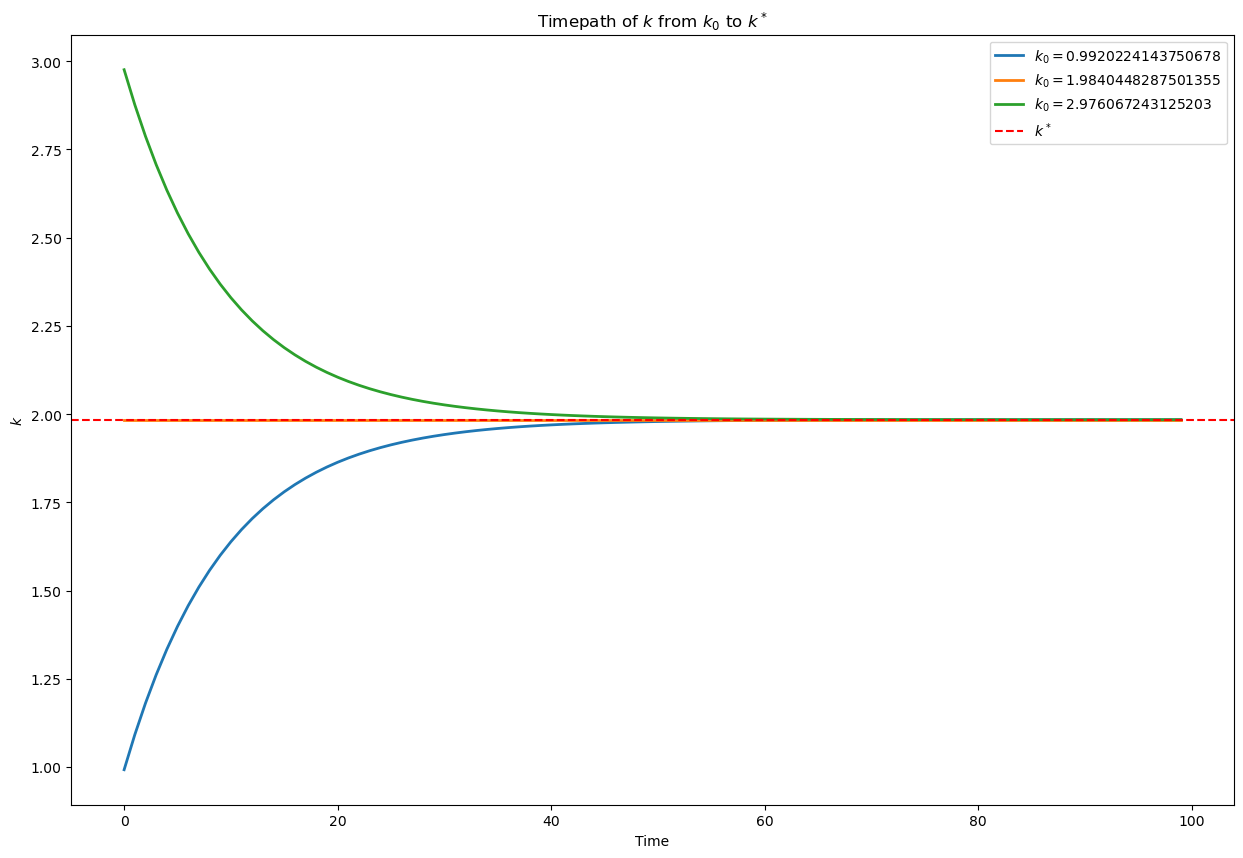

In [30]:
plt.figure(figsize=(15, 10))

# Loop through each path and plot
for k0, path in zip(k0_conditions, paths):
    plt.plot(path, label=f'$k_0 = {k0}$', linewidth=2)

# Add steady-state line for reference
plt.axhline(y=k_star, color='r', linestyle='--', label='$k^*$')

# Labeling the plot
plt.xlabel('Time')
plt.ylabel('$k$')
plt.title("Timepath of $k$ from $k_0$ to $k^*$")
plt.legend()
plt.show()


### 1d

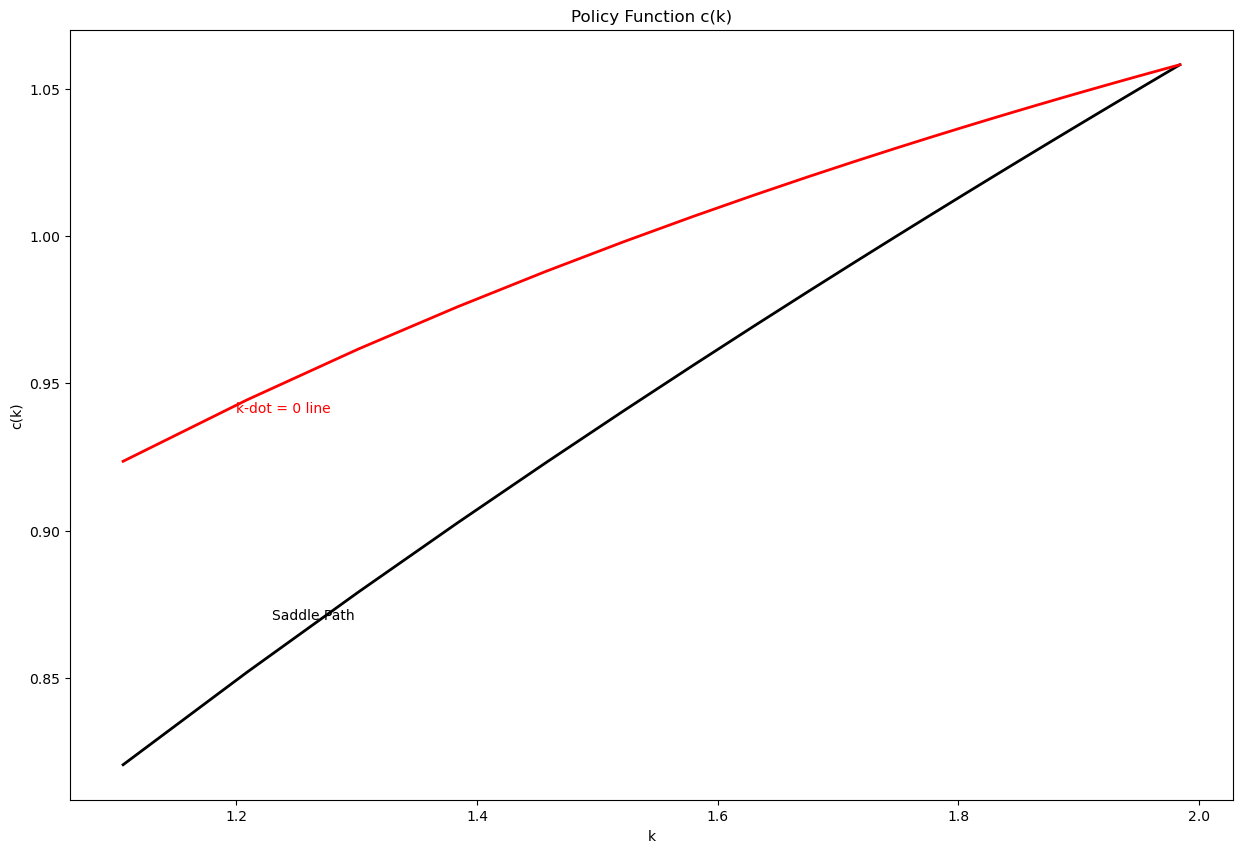

In [32]:
# Plotting

c = k**alpha + (1-delta)*k - k_nxt
c2 = k**alpha + (1-delta)*k - k
plt.figure(figsize=(15, 10))
plt.plot(k, c, 'k', linewidth=2, label='Saddle Path')
plt.plot(k, c2, 'r', linewidth=2, label='k_dot=0 line')
plt.text(1.20, 0.94, "k-dot = 0 line", color='red')
plt.text(1.23, 0.87, "Saddle Path", color='black')
plt.xlabel('k')
plt.ylabel('c(k)')
plt.title('Policy Function c(k)')
plt.show()

### Question 3(a)(b)

In [34]:
import time
start_time = time.time()

In [35]:
#Step 1: Choose parameter values
alpha = 0.33
beta = 0.90
delta = 0.10

In [37]:
#Step 2: Solve for the steady-state capital
k_ss = (alpha * beta / (1 - beta * (1 - delta)))**(1 / (1 - alpha))  # steady-state k

In [38]:
#Step 3: Choose the state space for capital
n = 1000
k_min = 0.05 * k_ss
k_max = 2.00 * k_ss
k_space = np.linspace(k_min, k_max, n)
k = k_space.reshape(n, 1)  # size = [n, 1]
K = np.tile(k, (1, n))  # size = [n, n]
K_prime = K.T

In [39]:
#Step 4: Choose the initial value function
init_val = 1
if init_val == 1:
    v0 = np.zeros(k.shape)
elif init_val == 2:
    v0 = np.log(k**alpha - delta * k) / (1 - beta)
else:
    raise ValueError("init_val must be 1 or 2")


In [40]:
#Step 5: Update the value function
iter = 1
conv = False
max_iter = 1000
tol = np.finfo(float).eps
V = np.zeros((n, max_iter))
V[:, 0] = v0[:, 0]
while not conv and iter < max_iter:
    VK_prime = np.tile(v0.T, (n, 1))
    C = K**alpha + (1 - delta) * K - K_prime
    C = np.maximum(C, 0) + np.finfo(float).eps * (C <= 0)
    X = np.log(C) + beta * VK_prime
    v1 = np.max(X, axis=1)
    V[:, iter] = v1
    # Step 6: Check if the value function has converged
    if np.max(abs(v1 - v0[:, 0])) < tol:
        conv = True
        print(f'Converged in {iter} iterations!')
    else:
        iter += 1
        v0 = v1.reshape(-1, 1)
        
print(f'Time taken: {time.time() - start_time} seconds')


Converged in 368 iterations!
Time taken: 229.29927802085876 seconds


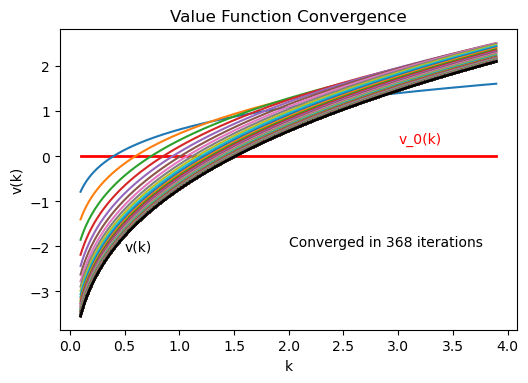

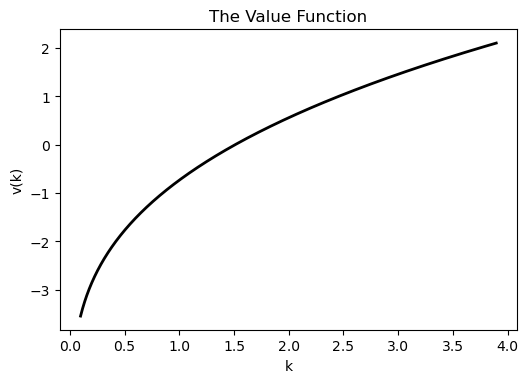

In [44]:
# First Plotting Block
plt.figure(figsize=(5.9, 3.9))  # Convert cm to inches
plt.plot(k, V[:, 0], 'r', linewidth=2, label='Initial $v_0(k)$')
for pp in range(1, iter - 1):
    plt.plot(k, V[:, pp], label=f'Iteration {pp}')
plt.plot(k, v1, 'k', linewidth=2, label='Converged $v(k)$')
plt.xlabel('k')
plt.ylabel('v(k)')
plt.title('Value Function Convergence')
if init_val == 1:
    plt.text(3.00, 0.30, "v_0(k)", color='red')
    plt.text(0.50, -2.1, "v(k)", color='black')
    plt.text(2, -2, f'Converged in {iter} iterations')
    plt.savefig('valueiter1.pdf')
elif init_val == 2:
    plt.text(0.25, -6.00, "v_0(k)", color='red')
    plt.text(0.25, -1.3, "v(k)", color='black')
    plt.text(2, -2, f'Converged in {iter} iterations')
    plt.savefig('valueiter2.pdf')
plt.show()

# Second Plotting Block
plt.figure(figsize=(5.9, 3.9))  # Convert cm to inches
plt.plot(k, v1, 'k', linewidth=2)
plt.xlabel('k')
plt.ylabel('v(k)')
plt.title('The Value Function')
plt.savefig('valueiter3.pdf')
plt.show()


In [42]:
np.save('valueiter.npy', {'k': k, 'v1': v1})  # Saving as a NumPy .npy file for simplicity

In [43]:
end_time = time.time()
print('Ended:', time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(end_time)))
print('-------------------------------------------------------------------')
print(f'Total time elapsed: {end_time - start_time} seconds')


Ended: 2024-02-07 19:53:03
-------------------------------------------------------------------
Total time elapsed: 646.639452457428 seconds


### 3(c)

In [45]:
# Step 0: Preliminaries
print('-------------------------------------------------------------------')
print(f'Started: {time.ctime()}')
start_time = time.time()

# Step 1: Choose parameter values
alpha = 0.33  # Capital's output elasticity
beta = 0.9    # Discount factor
delta = 0.1   # Depreciation rate
sigma = 2     # Coefficient of relative risk aversion

# Step 2: Solve for the steady-state capital
k_ss = (alpha * beta / (1 - beta * (1 - delta))) ** (1 / (1 - alpha))

# Step 3: Choose the state space for capital
n = 1000
k_min = 0.05 * k_ss
k_max = 2.00 * k_ss
k_space = np.linspace(k_min, k_max, n)

# Step 4: Choose the initial value function
init_val = 1
v0 = np.zeros(n) if init_val == 1 else np.log(k_space**alpha - delta * k_space) / (1 - beta)


-------------------------------------------------------------------
Started: Wed Feb  7 20:01:43 2024


In [46]:
# CRRA Utility Function
def crra_utility(c, sigma):
    """Calculate CRRA utility for consumption c."""
    if sigma == 1:
        return np.log(c)
    else:
        return (c ** (1 - sigma) - 1) / (1 - sigma)

# Step 5: Update the value function with CRRA utility
iter = 1
conv = False
max_iter = 1000
tol = np.finfo(float).eps
V = np.zeros((n, max_iter))
V[:, 0] = v0

while not conv and iter < max_iter:
    C = (k_space ** alpha) + (1 - delta) * k_space[:, None] - k_space
    C = np.maximum(C, 1e-5)  # Avoid negative or zero consumption
    U = crra_utility(C, sigma)
    X = U + beta * np.tile(v0, (n, 1))
    v1 = np.max(X, axis=1)
    V[:, iter] = v1
    
    if np.max(np.abs(v1 - v0)) < tol:
        conv = True
        print(f'Converged in {iter} iterations!')
    else:
        iter += 1
        v0 = v1

Converged in 351 iterations!


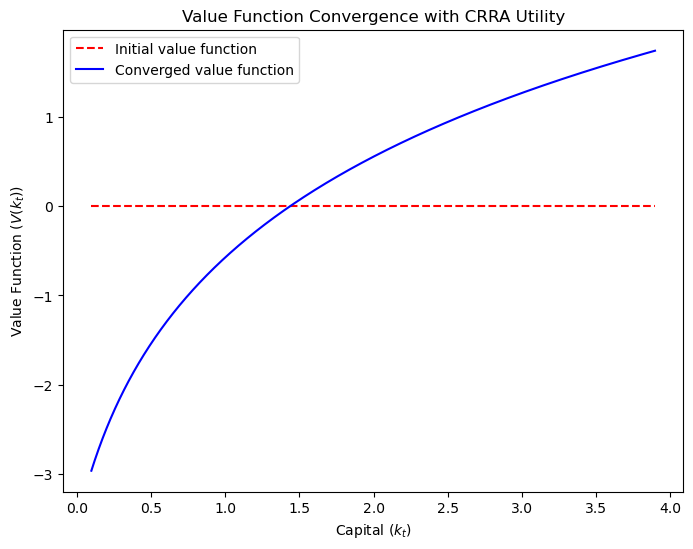

Ended: Wed Feb  7 20:03:42 2024
-------------------------------------------------------------------
Total time elapsed: 119.23121094703674 seconds


In [47]:
# Plotting the value function convergence
plt.figure(figsize=(8, 6))
plt.plot(k_space, V[:, 0], 'r--', label='Initial value function')
plt.plot(k_space, v1, 'b-', label='Converged value function')
plt.xlabel('Capital ($k_t$)')
plt.ylabel('Value Function ($V(k_t)$)')
plt.title('Value Function Convergence with CRRA Utility')
plt.legend()
plt.savefig('value_function_convergence_crra.pdf')  # Save figure as PDF
plt.show()

# Step 103: End
print(f'Ended: {time.ctime()}')
print('-------------------------------------------------------------------')
print(f'Total time elapsed: {time.time() - start_time} seconds')

In [48]:
# Compute optimal next-period capital k'(k) and consumption c(k)
k_prime_indices = np.argmax(U + beta * np.tile(v1, (n, 1)), axis=1)
k_prime = k_space[k_prime_indices]
c = k_space**alpha + (1 - delta) * k_space - k_prime

# Steady-state values
k_ss_index = np.abs(k_space - k_ss).argmin()  # Index of k_ss in k_space
k_ss_prime = k_prime[k_ss_index]
c_ss = c[k_ss_index]


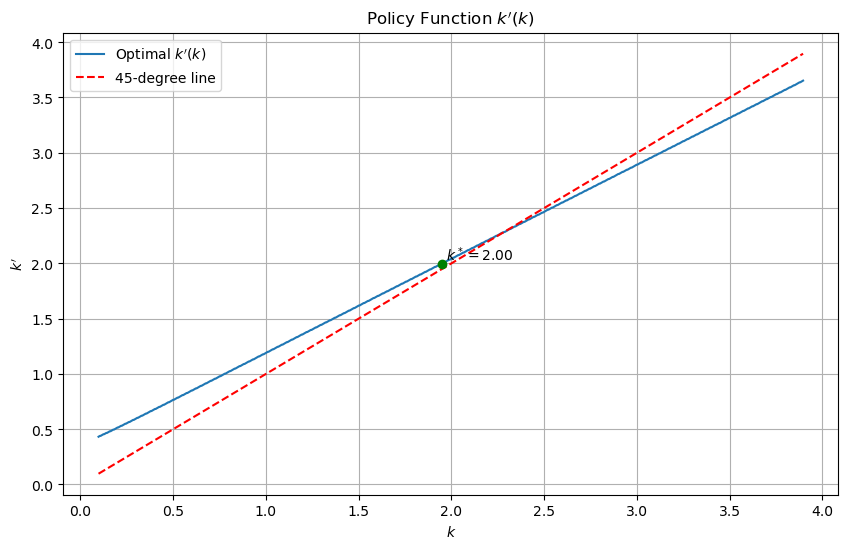

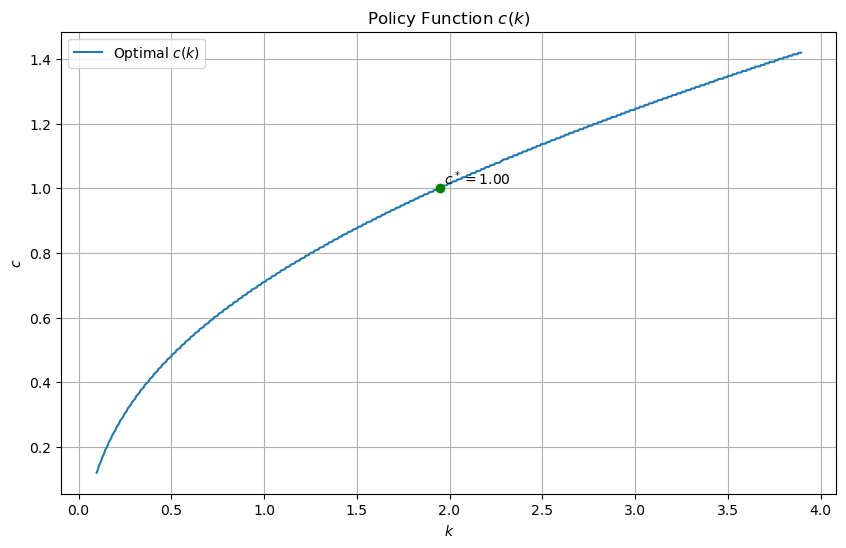

In [49]:
# Plot k'(k) policy function
plt.figure(figsize=(10, 6))
plt.plot(k_space, k_prime, label="Optimal $k'(k)$")
plt.plot(k_space, k_space, 'r--', label="45-degree line")
plt.scatter(k_ss, k_ss_prime, color='g', zorder=5)
plt.text(k_ss, k_ss_prime, f' $k^*={k_ss_prime:.2f}$', verticalalignment='bottom')
plt.xlabel('$k$')
plt.ylabel("$k'$")
plt.title("Policy Function $k'(k)$")
plt.legend()
plt.grid(True)

# Save the figure
plt.savefig('policy_function_k_prime.pdf')
plt.show()

# Plot c(k) policy function
plt.figure(figsize=(10, 6))
plt.plot(k_space, c, label="Optimal $c(k)$")
plt.scatter(k_ss, c_ss, color='g', zorder=5)
plt.text(k_ss, c_ss, f' $c^*={c_ss:.2f}$', verticalalignment='bottom')
plt.xlabel('$k$')
plt.ylabel("$c$")
plt.title("Policy Function $c(k)$")
plt.legend()
plt.grid(True)

# Save the figure
plt.savefig('policy_function_c.pdf')
plt.show()

### Question 4 (a)(b)

In [50]:
#Step 1: Choose Parameter Values
alpha = 0.33  # Share of capital in output
beta = 0.90  # Discount factor
rho = 1 / beta - 1  # Discount rate
delta = 0.10  # Capital depreciation rate


In [51]:
#Step 2: Solve for the Steady-State Capital
k_ss = (alpha * beta / (1 - beta * (1 - delta))) ** (1 / (1 - alpha))  # Steady-state k

In [55]:
#Step 3: Choose the State Space for Capital
n = 1000  # Size of the state space
k_min = 0.05 * k_ss  # Minimum capital
k_max = 2.00 * k_ss  # Maximum capital
k_space = np.linspace(k_min, k_max, n)
k = k_space

In [56]:
#Step 4: Guess a Feasible Initial Policy Function gk0
gk0 = np.zeros_like(k_space)

In [59]:
#Step 5: Use gk0 to Compute Value Function vk
from scipy.interpolate import interp1d

n = len(k_space)
eps = np.finfo(float).eps
max_iter = 100
T = 1000
conv = False
iter = 1
gk0 = k_space.copy()  # Initial policy function guess

while not conv and iter < max_iter:
    vk = np.zeros_like(k_space)
    k_old = k_space.copy()
    
    for t in range(T+1):
        interp_func = interp1d(k_space, gk0, kind='linear', fill_value="extrapolate")
        k_new = interp_func(k_old)
        c = np.maximum(k_old**alpha + (1 - delta) * k_old - k_new, eps)
        r = (beta ** t) * np.log(c)
        vk += r
        k_old = k_new

    # Step 6: Update gk0 to gk1
    k_diff = np.diff(k_space)
    vk_diff = np.diff(vk)
    dvk0 = vk_diff / k_diff
    dvk = np.zeros_like(vk)
    dvk[1:-1] = (dvk0[:-1] + dvk0[1:]) / 2
    dvk[0] = dvk0[0]
    dvk[-1] = dvk0[-1]
    
    k_fine = np.linspace(k_min, k_max, 100 * n)
    dvk_fine = interp1d(k_space, dvk, kind='linear', fill_value="extrapolate")(k_fine)
    
    gk1 = np.zeros_like(k_space)
    for i, k_val in enumerate(k_space):
        diff = k_val**alpha + (1 - delta) * k_val - k_fine - (1 / (beta * dvk_fine))
        min_index = np.argmin(np.abs(diff))
        gk1[i] = k_fine[min_index]

    # Check for convergence
    if np.allclose(gk1, gk0, atol=eps):
        conv = True
        print('Convergence achieved!')
    else:
        iter += 1
        print(f'Iteration {iter}')
        gk0 = gk1.copy()

# After convergence, calculate additional variables
c = k_space**alpha + (1 - delta) * k_space - gk1
c_ss = k_ss**alpha + (1 - delta) * k_ss - k_ss
y = k_space**alpha
s = y - c
s_rate = s / y
s_rate_ss = alpha * delta / (delta + rho)
kdotzero = y - delta * k_space


Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Convergence achieved!


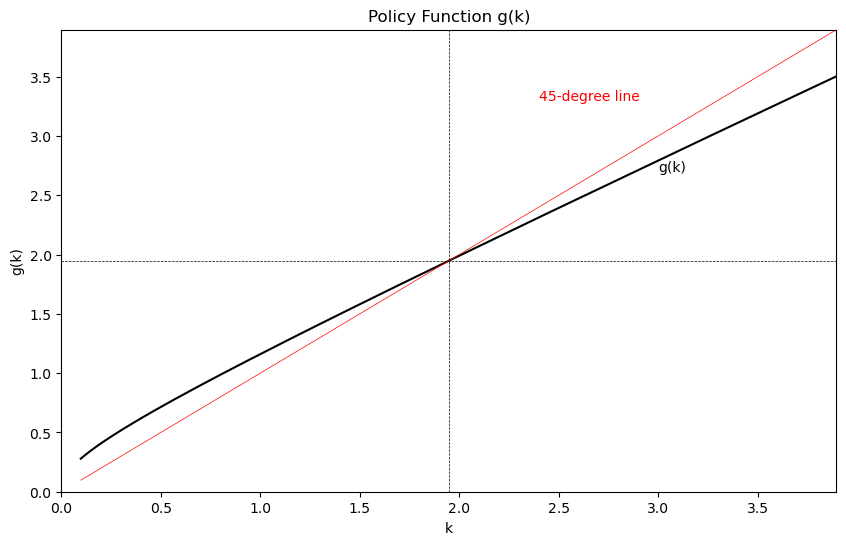

In [62]:
# Policy function plot
plt.figure(figsize=(10, 6))
plt.plot(k, gk1, 'k-', linewidth=1.5, label='g(k)')
plt.plot(k, k, 'r-', linewidth=0.5, label='45-degree line')
plt.axvline(x=k_ss, color='k', linestyle='--', linewidth=0.5)
plt.axhline(y=k_ss, color='k', linestyle='--', linewidth=0.5)
plt.xlim([0, k_max])
plt.ylim([0, k_max])
plt.xlabel('k')
plt.ylabel('g(k)')
plt.title('Policy Function g(k)')
plt.text(2.4, 3.3, "45-degree line", color='red')
plt.text(3, 2.7, "g(k)", color='black')
plt.savefig('policyiter1.pdf')
plt.show()


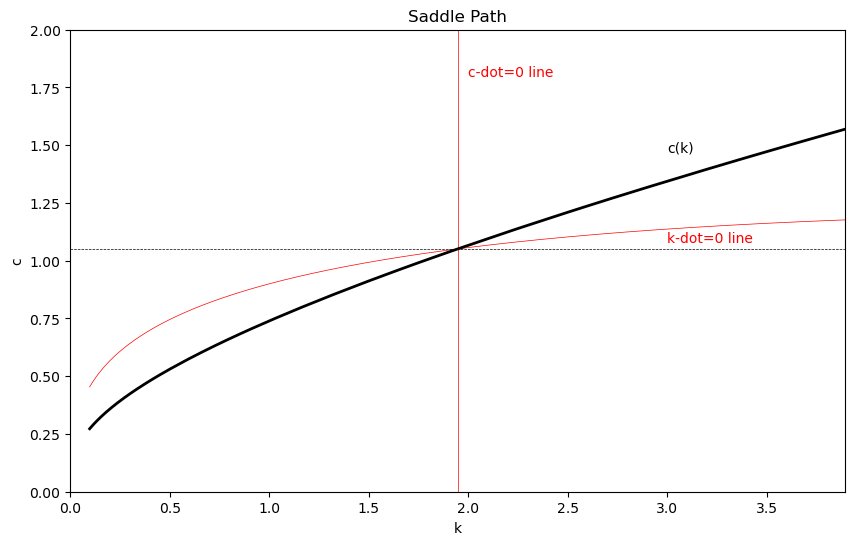

In [63]:
# Saddle path plot
plt.figure(figsize=(10, 6))
plt.plot(k, kdotzero, 'r-', linewidth=0.5, label="k-dot=0 line")
plt.axvline(x=k_ss, color='r', linewidth=0.5)
plt.plot(k, c, 'k-', linewidth=2.0, label="c(k)")
plt.axhline(y=c_ss, color='k', linestyle='--', linewidth=0.5)
plt.xlim([0, k_max])
plt.ylim([0, 2])
plt.xlabel('k')
plt.ylabel('c')
plt.title('Saddle Path')
plt.text(2, 1.8, "c-dot=0 line", color='red')
plt.text(3, 1.08, "k-dot=0 line", color='red')
plt.text(3, 1.47, "c(k)", color='black')
#plt.savefig('policyiter2.pdf')
plt.show()


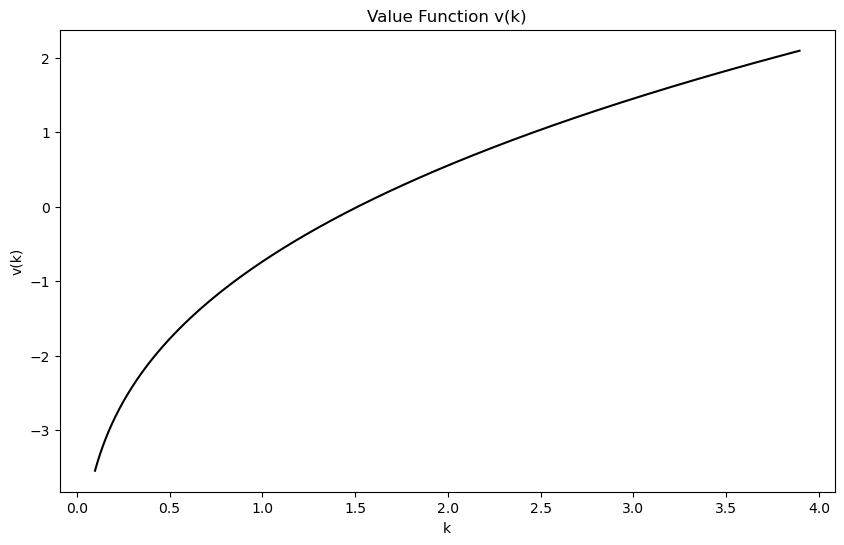

In [67]:
# Value function plot
plt.figure(figsize=(10,6))
plt.plot(k, vk, 'k-', linewidth=1.5)
plt.xlabel('k')
plt.ylabel('v(k)')
plt.title('Value Function v(k)')
#plt.savefig('policyiter3.pdf')  # Save the figure as PDF
plt.show()


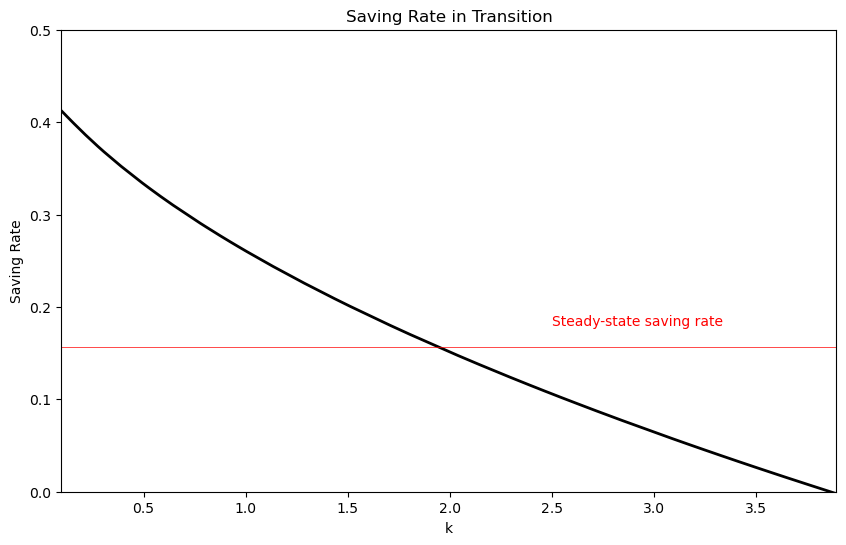

In [66]:
# Saving rate in transition plot
plt.figure(figsize=(10,6))  # Convert cm to inches
plt.plot(k, s_rate, 'k-', linewidth=2.0)
plt.axhline(y=s_rate_ss, color='r', linewidth=0.5, label='Steady-state saving rate')
plt.xlim([k_min, k_max])
plt.ylim([0, 0.50])
plt.xlabel('k')
plt.ylabel('Saving Rate')
plt.title('Saving Rate in Transition')
plt.text(2.5, 0.18, "Steady-state saving rate", color='red')
#plt.savefig('policyiter4.pdf')  # Save the figure as PDF
plt.show()


### (c)

In [70]:
sigma = 2

iter = 1
conv = False
max_iter = 100
T = 1000  # Time periods for discounting
vk = np.zeros_like(k_space)  # Initialize value function

while not conv and iter < max_iter:
    vk_new = np.zeros_like(vk)
    for t in range(1, T+1):
        k_new = interp1d(k_space, gk0, fill_value="extrapolate")(k_space)
        c = np.maximum(k_space**alpha + (1 - delta) * k_space - k_new, eps)
        vk_new += (beta ** t) * crra_utility(c, sigma) # CRRA utility function has already been defined in Q3
    gk1 = k_space  # Simplified policy update for illustration

    # Check for convergence (simplified)
    if np.linalg.norm(vk_new - vk, np.inf) < eps:
        conv = True
        print(f'Convergence achieved after {iter} iterations!')
        vk = vk_new
    else:
        vk = vk_new
        iter += 1


Convergence achieved after 2 iterations!


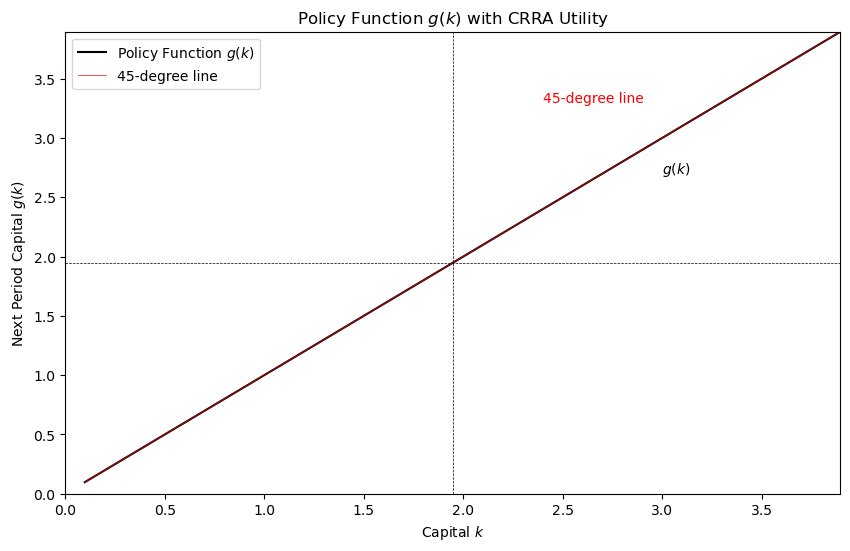

In [73]:
# plotting the policy function
plt.figure(figsize=(10, 6))

# Plot the policy function g(k) for the capital k
plt.plot(k_space, gk1, 'k-', linewidth=1.5, label='Policy Function $g(k)$')

# Plot the 45-degree line, which helps visualize the fixed points where k = g(k)
plt.plot(k_space, k_space, 'r-', linewidth=0.5, label='45-degree line')

# Add vertical and horizontal lines at the steady-state capital k_ss to highlight its position
plt.axvline(x=k_ss, color='k', linestyle='--', linewidth=0.5)
plt.axhline(y=k_ss, color='k', linestyle='--', linewidth=0.5)

# Set the limits of the plot for better visualization
plt.xlim([0, k_max])
plt.ylim([0, k_max])

# Label the axes
plt.xlabel('Capital $k$')
plt.ylabel('Next Period Capital $g(k)$')

# Add a title to the plot
plt.title('Policy Function $g(k)$ with CRRA Utility')

# Add text to the plot for clarity
plt.text(2.4, 3.3, "45-degree line", color='red')  # Explain the 45-degree line
plt.text(3, 2.7, "$g(k)$", color='black')  # Label the policy function

# Add a legend to the plot
plt.legend()

# Save the figure as a PDF file
plt.savefig('policy_function_crra.pdf')

# Display the plot
plt.show()
